In [1]:
import pandas as pd
import numpy as np

# Create a fake car dataset
np.random.seed(1)

data = pd.DataFrame({
    'Year': np.random.randint(2005, 2022, 100),
    'Mileage': np.random.randint(15000, 150000, 100),
    'EngineSize': np.random.uniform(1.0, 5.0, 100),
    'Horsepower': np.random.randint(70, 400, 100),
    'Price': np.nan  # placeholder
})

# Simulate price based on a formula
data['Price'] = (
    30000 
    - (2022 - data['Year']) * 1000 
    - data['Mileage'] * 0.05 
    + data['EngineSize'] * 2000 
    + data['Horsepower'] * 10 
    + np.random.normal(0, 1000, 100)  # noise
)

# Preview data
data.head()


Year  Mileage  EngineSize  Horsepower         Price
0  2010   123252    1.381231         198  19022.354184
1  2016   128255    1.573052         220  24005.881504
2  2017   109474    4.724052         167  30400.486415
3  2013   121166    3.306337         234  24442.305106
4  2014   102904    4.358581         353  29944.317548

In [2]:
# Define features (X) and target (y)
X = data[['Year', 'Mileage', 'EngineSize', 'Horsepower']]
y = data['Price']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Intercept: -1979743.5242239493
Coefficients: [ 9.93912390e+02 -5.02918816e-02  1.95546048e+03  1.13864728e+01]
MSE: 772055.3978453242
R² Score: 0.9732901502883152


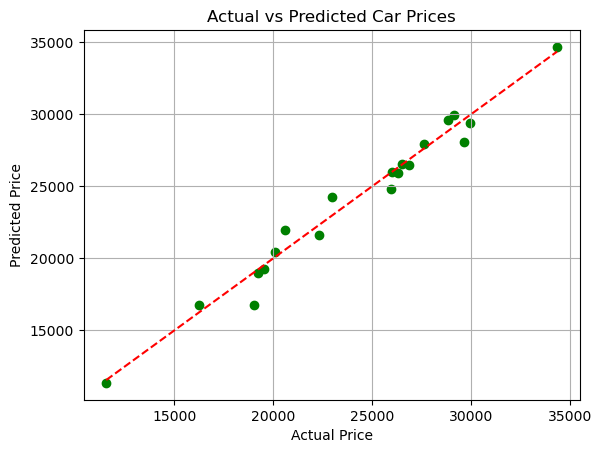

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
